# **Nhập môn phân tích độ phức tạp thuật toán - 20TN**
## **Bài tập lý thuyết 2:** Tìm độ phức tạp của thuật toán bằng phương pháp thực nghiệm

**Thông tin sinh viên:**
- **Tên:** Nguyễn Bảo Tín 
- **MSSV:** 20120596

**Thông tin bài làm:**
- **Ngôn ngữ lập trình:** Python
- **Trực quan hóa:** Matplotlib

#### **Mục lục**

<ul style="list-style-type: none">
    <li><a href="#import">Import thư viện và một số hàm cần thiết</a></li>
    <li><a href="#bai1">1 - Bài toán tìm bao đóng lồi của tập điểm</a></li>
    <li><a href="#bai1_vetcan">&emsp; 1.1 - Giải thuật 1: Vét cạn (Brute Force)</a></li>
    <li><a href="#bai1_goiqua">&emsp; 1.2 - Giải thuật 2: Gói quà (Gift Wrapping)</a></li>
    <li><a href="#sosanh1">&emsp; 1.3 - So sánh 2 giải thuật</a></li>
    <li><a href="#bai2">2 - Bài toán tìm cặp điểm gần nhất</a></li>
    <li><a href="#bai2_vetcan">&emsp; 2.1 - Giải thuật 1: Vét cạn (Brute Force)</a></li>
    <li><a href="#bai2_dequy">&emsp; 2.2 - Giải thuật 2: Chia để trị (Divide and Conquer)</a></li>
    <li><a href="#sosanh2">&emsp; 2.3 - So sánh 2 giải thuật</a></li>
    <li><a href="#ref">Tham khảo</a></li>
</ul>


<a id="import"></a>

### **Import thư viện và cài đặt một số hàm cần thiết:**

In [1]:
# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import random
import time

epsilon = 0.00001
SIZES = [i for i in range(20, 301, 20)]

In [2]:
def Test_Generator(n, seed=None):
    """Hàm sinh điểm test 
    Input: 
        - n là kích thước tập test
        - seed dùng để random thống nhất 1 input
    """
    S = np.empty([n, 2], dtype=int)
    for i in range(n):
        if seed is not None: 
            random.seed(seed + i)
        S[i] = np.array((random.randint(-100, 100), random.randint(-100, 100)))
    return S

In [3]:
def show_points(S, convex_hull = None, nearest_line = None):
    """Hàm vẽ các điểm trong tập test và đường bao convex_hull"""
    x = [s[0] for s in S]
    y = [s[1] for s in S]
    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, s = 15, color='black')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Test algorithm with {len(S)} Points')
    if convex_hull is not None:
        plt.plot(convex_hull[:, 0], convex_hull[:, 1], color='red')
    if nearest_line is not None:
        plt.plot(nearest_line[:, 0], nearest_line[:, 1], color='red')
    plt.show()

In [4]:
def calculate_angle1(point1, point2):
    """Hàm tính góc tạo bởi đoạn thẳng nối point1, point2 với trục Ox."""
    x1, y1 = point1
    x2, y2 = point2
    a = (y2 - y1) / (x2 - x1 + epsilon)
    # y = ax + b => ax - y + b = 0 => vector pháp tuyến của đoạn thẳng point1_point2 là: (a, -1)
    # vector pháp tuyến của trục Ox là: (1, 0)
    tan_theta = -1 / (a + epsilon)
    theta = np.arctan(tan_theta)
    return theta

<a id="baitoan"></a>

### **Yêu cầu**
Hãy xây dựng tối thiểu 2 giải thuật cho các bài toán dưới đây. Sau đó sử dụng phương pháp thực nghiệm để ước lượng dộ phức tạp cho các giải thuật đã được xây dựng.

<a id="bai1"></a>

### **1 - Bài toán tìm bao đóng lồi của tập điểm**
Đa giác lồi là một đa giác mà trong đó không có đoạn thằng nối giữa 2 điểm trên đường biên đi ra ngoài đa giác. Cho tập điểm S, tìm đa giác lồi chứa tất cả các điểm thuộc về tập này.

<a id="bai1_vetcan"></a>

#### **1.1 - Giải thuật 1**: Phương pháp vét cạn - Brute force - Độ phức tạp $\mathcal{O}(n^3)$

**Ý tưởng:** Cứ lấy 2 điểm bất kỳ rồi kiểm tra xem các điểm còn lại có nằm cùng phía với với đường thẳng đi qua 2 điểm đó hay không.

In [5]:
def is_on_same_side(S, id_point1, id_point2):
    """Kiểm tra các điểm còn lại trong S có đều nằm cùng phía so với 
    đoạn thẳng nối 2 điểm có index thứ id_point1 và id_point2
    Return: True/False
    """
    x1, y1 = S[id_point1]
    x2, y2 = S[id_point2]
    a = (y2 - y1) / (x2 - x1 + epsilon)
    b = y1 - a * x1
    prev_side = None
    for i in range(len(S)):
        if i == id_point1 or i == id_point2:
            continue
        
        if a * S[i][0] + b - S[i][1] <= 0:
            side = True
        else: side = False

        if prev_side is None:
            prev_side = side
        elif prev_side != side:
            return False
        else:
            continue
    
    return True


In [6]:
def is_on_same_side_cmp(S, id_point1, id_point2):
    """Kiểm tra các điểm còn lại trong S có đều nằm cùng phía so với 
    đoạn thẳng nối 2 điểm có index thứ id_point1 và id_point2.
    Lưu ý: có đếm các phép so sánh bên trong hàm
    Return: True/False, giá trị biến đếm phép so sánh 'cnt'
    """
    cnt = 0
    x1, y1 = S[id_point1]
    x2, y2 = S[id_point2]
    a = (y2 - y1) / (x2 - x1 + epsilon)
    b = y1 - a * x1
    prev_side = None
    for i in range(len(S)):
        cnt += 1

        cnt += 2
        if i == id_point1 or i == id_point2:
            continue
        
        cnt += 1
        if a * S[i][0] + b - S[i][1] <= 0:
            side = True
        else: 
            side = False

        cnt += 1
        if prev_side is None:
            prev_side = side
        elif prev_side != side:
            cnt += 1
            return False, cnt
        else:
            continue

    return True, cnt

In [7]:
def Convex_hull_BF(S):
    """Hàm tìm tập các điểm nằm trên đường bao lồi của tập điểm S. Hàm này có kết hợp luôn việc tính số phép so sánh.
    Return: 
        - convex_hull_points: tập các điểm trên đường bao lồi.
        - cnt: số phép so sánh.
    """
    cnt = 0
    convex_hull_points = []
    for i in range(len(S) - 1):
        cnt += 1
        for j in range(i + 1, len(S)):
            cnt += 1
            same_side, temp_cnt = is_on_same_side_cmp(S, i, j)
            cnt += temp_cnt
            if same_side:
                cnt += 1
                convex_hull_points.append(S[i])
                convex_hull_points.append(S[j])
    convex_hull_points = np.unique(convex_hull_points, axis=0)
    convex_hull_points = np.append(convex_hull_points, np.reshape(convex_hull_points[0], (1, 2)), axis=0)
    return convex_hull_points, cnt

In [8]:
def Convex_hull_BF_Visualize(S):
    """Hàm tìm tập các điểm nằm trên đường bao lồi của tập điểm S. Hàm này có kết hợp luôn việc tính số phép so sánh.
       Hàm này sắp xếp lại thứ tự các điểm trên đường bao để phục vụ cho việc vẽ đường bao cho S.
    Return: 
        - convex_hull_points: tập các điểm trên đường bao lồi đã được sắp xếp thứ tự.
    """
    convex_hull_points = []
    for i in range(len(S) - 1):
        for j in range(i + 1, len(S)):
            if is_on_same_side(S, i, j):
                convex_hull_points.append(S[i])
                convex_hull_points.append(S[j])
    # convex_hull_points = np.unique(convex_hull_points, axis=0)

    unique_vals, indices = np.unique(convex_hull_points, return_index=True, axis=0)
    convex_hull_points = unique_vals[np.argsort(indices)]

    # sắp xếp lại thứ tự các điểm để vẽ hình
    first_point = convex_hull_points[np.argmin(convex_hull_points[:, 1])]
    sorted_indices = np.argsort([calculate_angle1(first_point, point) for point in convex_hull_points])
    convex_hull_points = convex_hull_points[sorted_indices]
    convex_hull_points = np.append(convex_hull_points, np.reshape(convex_hull_points[0], (1, 2)), axis=0)
    return convex_hull_points

Thử nghiệm thuật toán vét cạn trên tập S có 100 phần tử và trực quan hóa bài toán.

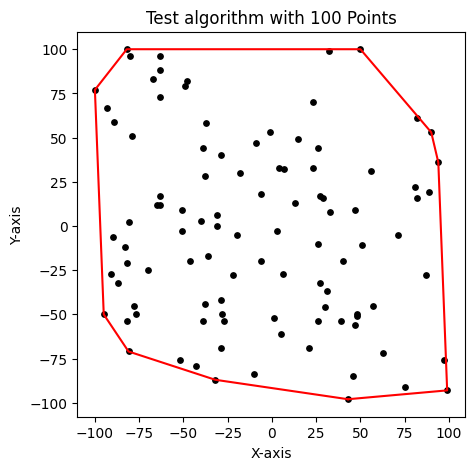

In [9]:
S = Test_Generator(100, 42)
convex = Convex_hull_BF_Visualize(S)
show_points(S, convex)

<a id="bai1_goiqua"></a>

#### **1.2 - Giải thuật 2**: Phương pháp bọc gói - Gift wrapping - Độ phức tạp $\mathcal{O}(n.h)$ - $h$ là số điểm trên bao lồi

**Ý tưởng:**
Giả sử tập điểm $S$ có $n$ điểm và tập điểm thuộc bao đóng lồi của chúng ta có $k$ điểm ($k \leq n$).

1. Tìm điểm có tung độ nhỏ nhất (điểm thấp nhất của tập điểm sẽ thuộc đường bao). Gọi điểm đó là $S_1$.
2. Từ $S_1$, tìm tia $S_1t$ (bắt đầu từ $S_1$ và đi qua các điểm còn lại thuộc tập S) sao cho hợp với trục hoành $Ox$ một góc nhỏ nhất. Giả sử tia thỏa mãn là $S_1S_2$. &rarr; Tìm được điểm $S_2$.
3. Từ $S_2$, tìm tia $S_2t$ sao cho hợp với $S_1S_2$ một góc nhỏ nhất. Giả sử tìm được tia thỏa mãn là $S_2S_3$. &rarr; Tìm được điểm $S_3$.
4. Cứ thế lặp lại bước **3** với các tia $S_ht\,(h = \overline{3..k})$ cho tới khi tia cuối cùng tìm được ($S_kS_1$) đi qua điểm đầu tiên của bao lồi ($S_1$). 

Khi đó bao lồi đóng của chúng ta là $\overline{S_1S_2S_3...S_kS_1}$.

In [10]:
def calculate_angle2(point1, point2, point3):
    """Hàm tính góc tạo bởi đoạn thẳng nối point1, point2 với đoạn thẳng nối point2, point3.
    Hàm này có kết hợp việc đếm số phép so sánh."""
    cnt = 0
    x1, y1 = point1
    x2, y2 = point2
    x3, y3 = point3
    a2 = (y2 - y1) / (x2 - x1 + epsilon)
    a1 = (y3 - y2) / (x3 - x2 + epsilon)
    # y = ax + b => ax - y + b = 0 => Vector pháp tuyến của đoạn thẳng nối 2 điểm point1_point2 là: (a2, -1)
    # vector pháp tuyến của đoạn thẳng nối point2-point3 là: (a1, -1)
    tan_theta = (- a2 + a1) / (a1 * a2 + 1 + epsilon)
    theta = np.arctan(tan_theta)

    # Chuẩn hóa các góc để các góc dương.
    cnt += 1
    if theta < 0:
        theta += np.pi
    cnt += 1
    if theta < epsilon:
        theta += 2 * np.pi

    return theta, cnt

In [11]:
def Convex_hull_GW(S):
    """Hàm tìm các điểm nằm trên đường bao lồi của tập điểm S bằng thuật toán Gói quà (Gift wrapping). 
    Hàm có kết hợp việc đếm số phép so sánh."""
    cnt = 0
    convex_hull_points = [] # Tập các điểm trên đường bao lồi
    
    # loại bỏ các điểm trùng lặp trong S
    S = np.unique(S, axis=0)

    # Tìm điểm đầu tiên cho tập bao lồi là điểm có tung độ bé nhất tập S
    first_point = S[np.argmin(S[:, 1])]
    convex_hull_points.append(first_point)

    # Điểm nào đã tìm được thì xóa khỏi tập S
    S = np.delete(S, np.where(S == first_point)[0][0], axis=0)

    min_idx = 0
    min_angle = 100
    # Tìm điểm thứ 2 cho tập bao lồi là điểm cùng với điểm đầu tiên, sẽ tạo với Ox 1 góc bé nhất
    for i in range(S.shape[0]):
        cnt += 1
        angle = calculate_angle1(first_point, S[i])
        
        cnt += 1
        if angle < min_angle:
            min_angle = angle
            min_idx = i
    
    convex_hull_points.append(S[min_idx])
    S = np.delete(S, [min_idx], axis=0)

    i = 0
    cnt += 1
    # Các điểm tiếp theo tìm dựa trên việc tính góc đã được trình bày trên phần ý tưởng
    while i < S.shape[0]:
        cnt += 1
        min_angle = 100
        j = 0

        # Thêm điểm đầu tiên vào để check điều kiện dừng (break) của vòng while
        cnt += 1
        if i == 1:
            S = np.append(S, np.reshape(first_point, (1, 2)), axis=0)
        
        cnt += 1
        while j < S.shape[0]:
            cnt += 1
            res = calculate_angle2(convex_hull_points[-2], convex_hull_points[-1], S[j])
            angle = res[0]
            cnt += res[1]
            cnt += 1
            if angle < min_angle:
                min_angle = angle
                min_idx = j
            j += 1
        convex_hull_points.append(S[min_idx])

        # Nếu điểm tìm được trùng với điểm đầu tiên thì ta thoát khỏi vòng lặp -> kết thúc thuật toán
        cnt += 2
        if S[min_idx][0] == first_point[0] and S[min_idx][1] == first_point[1]:
            cnt += 1
            break
        S = np.delete(S, [min_idx], axis=0)
        i += 1
    convex_hull_points = np.array(convex_hull_points)
    return convex_hull_points, cnt

Thử nghiệm thuật toán Gift Wrapping trên tập S có 100 phần tử và trực quan hóa bài toán.

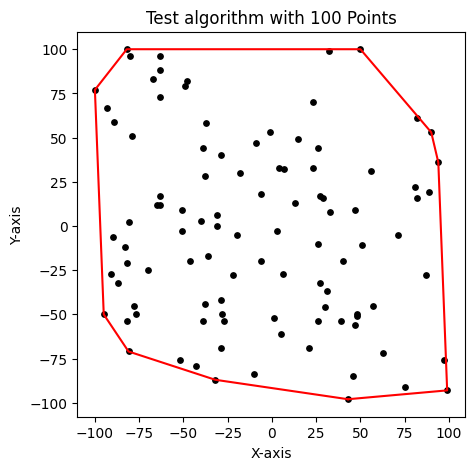

In [12]:
S = Test_Generator(100, 42)
convex = Convex_hull_GW(S)[0]
show_points(S, convex)

<a id="sosanh1"></a>

#### **1.3 - So sánh 2 giải thuật**

Chạy 2 thuật toán với các kích thước tập điểm S khác nhau, sau đó ta tiến hành vẽ các đồ thị để so sánh sự khác biệt về thời gian chạy cũng như số phép so sánh của 2 thuật toán cho cùng bài toán tìm **Đường bao lồi**.

In [13]:
def Convex_hull_stats(choice):
    """Hàm đo các thông số cần thiết cho đề bài.
    Return:
        - result: Danh sách các thông số cần thiết [[kích thước n, thời gian chạy, số phép so sánh], ...]
    """
    result = []
    for n in SIZES:
        for i in range(10):
            S = Test_Generator(n)
            start_time = time.time() # bat dau do
            comparison = Convex_hull_BF(S)[1] if choice == 1 else Convex_hull_GW(S)[1]
            end_time = time.time()
            processing_time = (end_time - start_time) # seconds
            result.append([n, i, processing_time, comparison])
        # Tinh trung binh
        processing_time = 0
        comparison = 0
        for i in range(10):
            processing_time += result[len(result) - i - 1][2]
            comparison += result[len(result) - i - 1][3]
        for i in range(10):
            result.pop()
        result.append([n, processing_time / 10, comparison / 10])
    result = np.array(result)
    return result

In [14]:
stats_convex_hull_BF = Convex_hull_stats(1)
# stats_convex_hull_BF

In [15]:
stats_convex_hull_GW = Convex_hull_stats(0)
# stats_convex_hull_GW

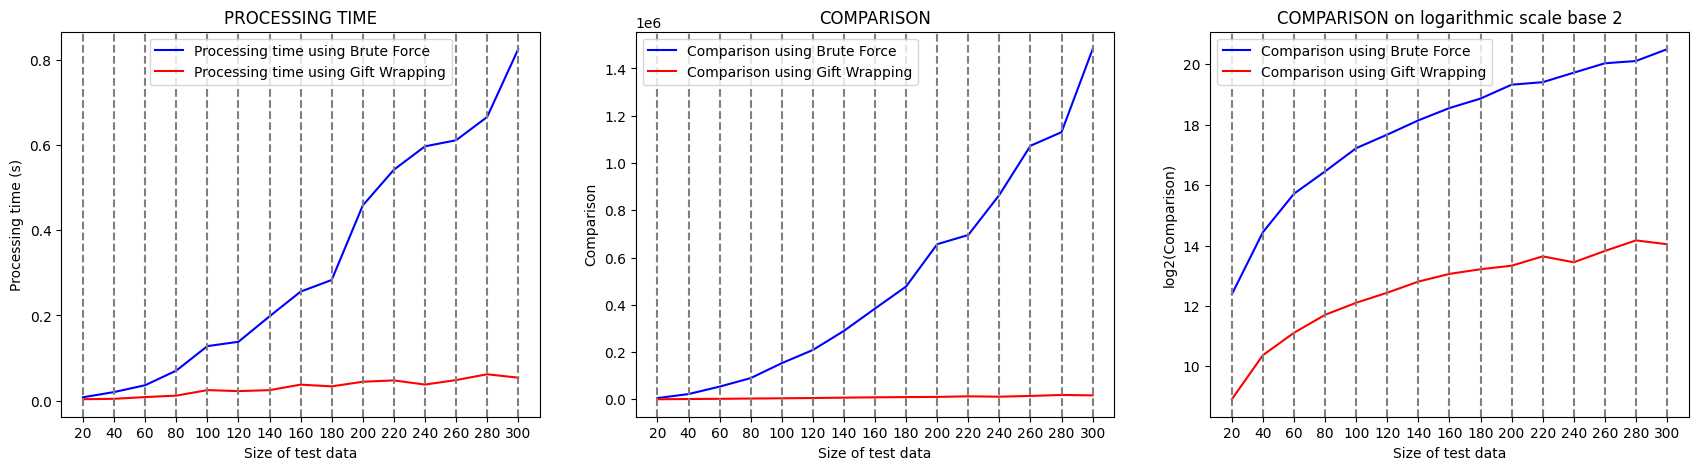

In [16]:
x_GW = stats_convex_hull_GW[:, 0]
processing_time_GW = stats_convex_hull_GW[:, 1]
comparison_GW = stats_convex_hull_GW[:, 2]

x_BF = stats_convex_hull_BF[:, 0]
processing_time_BF = stats_convex_hull_BF[:, 1]
comparison_BF = stats_convex_hull_BF[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(21, 5))

axs[0].plot(x_BF, processing_time_BF, '-b', label = 'Processing time using Brute Force')
axs[0].plot(x_BF, processing_time_GW, '-r', label = 'Processing time using Gift Wrapping')
axs[0].set_title('PROCESSING TIME')
axs[0].set_xlabel('Size of test data')
axs[0].set_ylabel('Processing time (s)')
axs[0].legend()

axs[1].plot(x_BF, comparison_BF, '-b', label = 'Comparison using Brute Force')
axs[1].plot(x_BF, comparison_GW, '-r', label = 'Comparison using Gift Wrapping')
axs[1].set_title('COMPARISON')
axs[1].set_xlabel('Size of test data')
axs[1].set_ylabel('Comparison')
axs[1].legend()

axs[2].plot(x_BF, np.log2(comparison_BF), '-b', label = 'Comparison using Brute Force')
axs[2].plot(x_BF, np.log2(comparison_GW), '-r', label = 'Comparison using Gift Wrapping')
axs[2].set_title('COMPARISON on logarithmic scale base 2')
axs[2].set_xlabel('Size of test data')
axs[2].set_ylabel('log2(Comparison)')
axs[2].legend()

axs[0].set_xticks(np.arange(20, 301, 20))
for i in range(len(SIZES)):
    axs[0].axvline(x=SIZES[i], color='gray', linestyle='--')
axs[1].set_xticks(np.arange(20, 301, 20))
for i in range(len(SIZES)):
    axs[1].axvline(x=SIZES[i], color='gray', linestyle='--')
axs[2].set_xticks(np.arange(20, 301, 20))
for i in range(len(SIZES)):
    axs[2].axvline(x=SIZES[i], color='gray', linestyle='--')

plt.show()

<a id="bai2"></a>

### **2. Bài toán tìm cặp điểm gần nhất**

<a id="bai2_vetcan"></a>

#### **2.1 - Giải thuật 1**: Phương pháp vét cạn - Brute force - Độ phức tạp $\mathcal{O}(n^2)$

**Ý tưởng:** Cứ lấy 2 điểm bất kỳ rồi kiểm tra xem khoảng cách giữa chúng có phải nhỏ nhất hay không.

In [17]:
def distance(point1, point2):
    return np.sqrt(np.square(point1[0] - point2[0]) + np.square(point1[1] - point2[1]))

In [18]:
def find_min_distance_BF(S):
    cnt = 0
    min_dist = 1000
    min_pair = np.empty([2, 2])
    S = np.unique(S, axis=0)
    for i in range(S.shape[0]):
        cnt += 1
        for j in range(S.shape[0]):
            cnt += 1

            cnt += 1
            if i == j: continue
            dist = distance(S[i], S[j])
            
            cnt += 1
            if dist < min_dist:
                min_dist = dist
                min_pair[0] = S[i]
                min_pair[1] = S[j]
    return min_dist, min_pair, cnt

Thử nghiệm thuật toán vét cạn trên tập S có 50 phần tử và trực quan hóa bài toán.

5.0
[[ 40. -20.]
 [ 40. -15.]]
7500


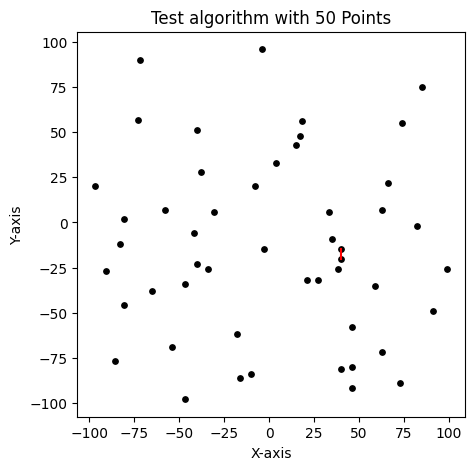

In [19]:
S = Test_Generator(50, 2)
min_dist, min_pair, cnt = find_min_distance_BF(S)
print(min_dist)
print(min_pair)
print(cnt)
show_points(S, nearest_line=min_pair)

<a id="bai2_dequy"></a>

#### **2.2 - Giải thuật 2**: Phương pháp Chia để trị - Divide and Conquer- Độ phức tạp $\mathcal{O}(n.logn)$

**Ý tưởng:**
Giả sử tập điểm $S$ có $n$ điểm.
Tìm điểm chính giữa theo trục hoành của tập điểm. Khi đó tập điểm được chia làm 2 nửa, 1 nửa bên trái ($S_1$) và 1 nửa bên phải ($S_2$) điểm đó.

&rarr; Khoảng cách ngắn nhất ***min_distance*** giữa 2 điểm trong S sẽ là:

***min(*** *min_distance(các điểm bên trái), min_distance(các điểm bên phải), min_distance(1 điểm bên trái và 1 điểm bên phải)* ***)***

In [20]:
def brute_force(S, start, end):
    """Tìm cặp điểm có khoảng cách nhỏ nhất của S từ start đến end dùng thuật vét cạn."""
    cnt = 0
    min_dist = float("inf")
    min_pair = np.empty([2, 2])
    for i in range(start, end):
        cnt += 1
        for j in range(i+1, end+1):
            cnt += 1
            d = distance(S[i], S[j])
            cnt += 1
            if d < min_dist:
                min_dist = d
                min_pair[0] = S[i]
                min_pair[1] = S[j]
    return min_dist, min_pair, cnt

In [21]:
def find_min_distance_DC(S, start, end):
    """Tìm cặp điểm có khoảng cách ngắn nhất trong tập S từ start đến end bằng phương pháp chia để trị (DC - Divide and Conquer)."""
    pair = np.empty([2, 2])
    cnt = 0

    cnt += 1
    if end - start <= 3:
        return brute_force(S, start, end)
    
    if start == 0 and end == S.shape[0] - 1:
        cnt += S.shape[0] * int(np.log2(S.shape[0]))
        S = S[np.lexsort(S.T[::-1])]

    mid = (start + end) // 2
    # Đệ quy tìm cặp điểm có khoảng cách ngắn nhất ở 2 nửa trái và phải
    d1, pair1, cnt_tmp = find_min_distance_DC(S, start, mid)
    cnt += cnt_tmp
    d2, pair2, cnt_tmp = find_min_distance_DC(S, mid+1, end)
    cnt += cnt_tmp
    d = min(d1, d2)

    cnt += 1
    pair = pair1 if d == d1 else pair2

    # Tìm cặp điểm có khoảng cách ngắn nhất 1 ở nửa trái và 1 ở nửa phải
    strip = []
    for i in range(start, end+1):
        cnt += 1
        
        cnt += 1
        if np.abs(S[i, 0] - S[mid, 0]) < d:
            strip.append(S[i])

    strip.sort(key=lambda p: p[1])
    cnt += len(strip) * int(np.log2(len(strip))) if len(strip) > 0 else 0

    for i in range(len(strip)):
        cnt += 1
        for j in range(i+1, len(strip)):
            cnt += 1

            cnt += 1
            if strip[j][1] - strip[i][1] >= d:
                break
            d_strip = distance(strip[i], strip[j])

            cnt += 1
            if d_strip < d:
                d = d_strip
                pair[0] = strip[i]
                pair[1] = strip[j]

    return d, pair, cnt

Thử nghiệm thuật toán vét cạn trên tập S có 50 phần tử và trực quan hóa bài toán.

5.0
[[ 40. -20.]
 [ 40. -15.]]
1129


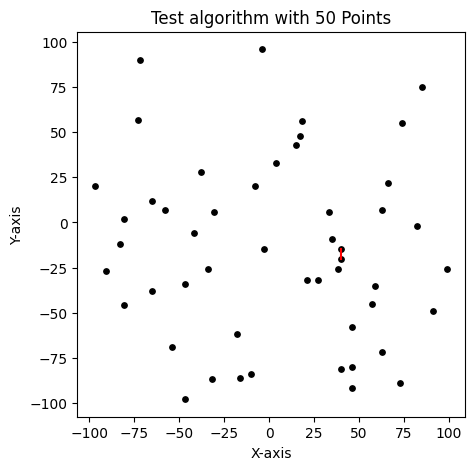

In [22]:
S = Test_Generator(50, 5)
min_dist_DC, min_pair_DC, cnt = find_min_distance_DC(S, 0, S.shape[0] - 1)
print(min_dist_DC)
print(min_pair_DC)
print(cnt)
show_points(S, nearest_line=min_pair_DC)

<a id="sosanh2"></a>

#### **2.3 - So sánh 2 giải thuật**

Chạy 2 thuật toán với các kích thước tập điểm S khác nhau, sau đó ta tiến hành vẽ các đồ thị để so sánh sự khác biệt về thời gian chạy cũng như số phép so sánh của 2 thuật toán cho cùng bài toán tìm **Tìm cặp điểm gần nhất**.

In [23]:
def Find_min_distance_stats(choice):
    """Hàm đo các thông số cần thiết cho đề bài.
    Return:
        - result: Danh sách các thông số cần thiết [[kích thước n, thời gian chạy, số phép so sánh], ...]
    """
    result = []
    for n in SIZES:
        for i in range(10):
            S = Test_Generator(n)
            start_time = time.time() # bat dau do
            comparison = find_min_distance_BF(S)[2] if choice == 1 else find_min_distance_DC(S, 0, S.shape[0] - 1)[2]
            end_time = time.time()
            processing_time = (end_time - start_time) # seconds
            result.append([n, i, processing_time, comparison])
        # Tinh trung binh
        processing_time = 0
        comparison = 0
        for i in range(10):
            processing_time += result[len(result) - i - 1][2]
            comparison += result[len(result) - i - 1][3]
        for i in range(10):
            result.pop()
        result.append([n, processing_time / 10, comparison / 10])
    result = np.array(result)
    return result

In [24]:
stats_min_dist_BF = Find_min_distance_stats(1)
# stats_min_dist_BF

In [25]:
stats_min_dist_DC = Find_min_distance_stats(0)
# stats_min_dist_DC

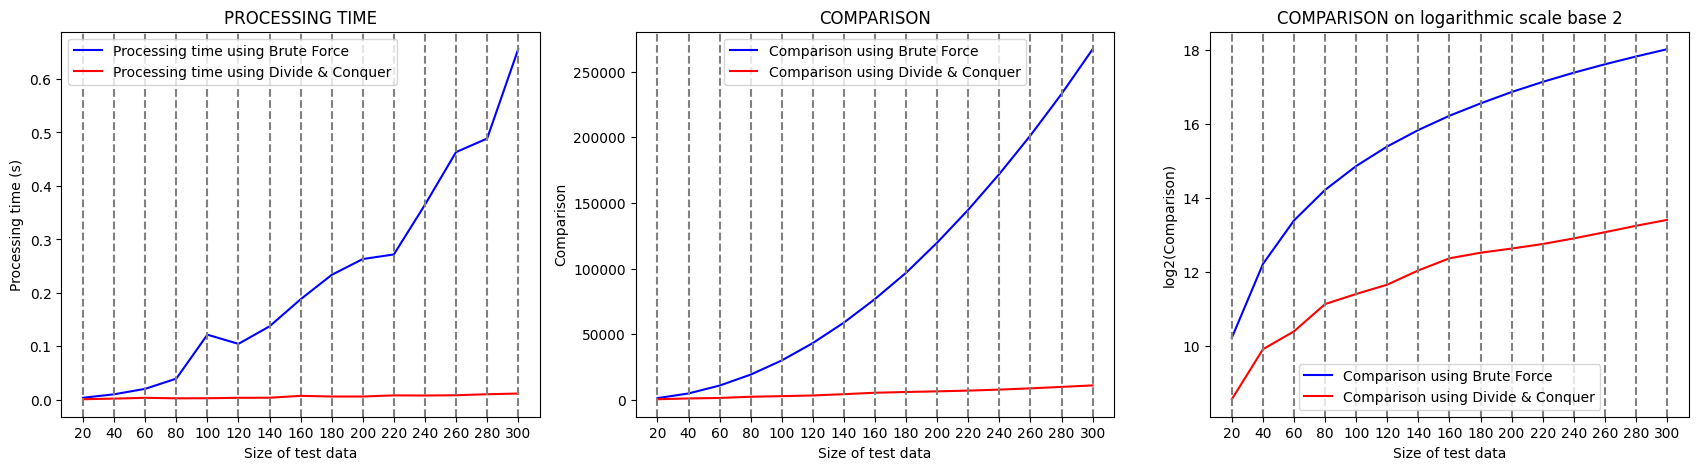

In [26]:
x_DC = stats_min_dist_DC[:, 0]
processing_time_DC = stats_min_dist_DC[:, 1]
comparison_DC = stats_min_dist_DC[:, 2]

x_BF = stats_min_dist_BF[:, 0]
processing_time_BF = stats_min_dist_BF[:, 1]
comparison_BF = stats_min_dist_BF[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(21, 5))

axs[0].plot(x_BF, processing_time_BF, '-b', label = 'Processing time using Brute Force')
axs[0].plot(x_BF, processing_time_DC, '-r', label = 'Processing time using Divide & Conquer')
axs[0].set_title('PROCESSING TIME')
axs[0].set_xlabel('Size of test data')
axs[0].set_ylabel('Processing time (s)')
axs[0].legend()

axs[1].plot(x_BF, comparison_BF, '-b', label = 'Comparison using Brute Force')
axs[1].plot(x_BF, comparison_DC, '-r', label = 'Comparison using Divide & Conquer')
axs[1].set_title('COMPARISON')
axs[1].set_xlabel('Size of test data')
axs[1].set_ylabel('Comparison')
axs[1].legend()

axs[2].plot(x_BF, np.log2(comparison_BF), '-b', label = 'Comparison using Brute Force')
axs[2].plot(x_BF, np.log2(comparison_DC), '-r', label = 'Comparison using Divide & Conquer')
axs[2].set_title('COMPARISON on logarithmic scale base 2')
axs[2].set_xlabel('Size of test data')
axs[2].set_ylabel('log2(Comparison)')
axs[2].legend()

axs[0].set_xticks(np.arange(20, 301, 20))
for i in range(len(SIZES)):
    axs[0].axvline(x=SIZES[i], color='gray', linestyle='--')
axs[1].set_xticks(np.arange(20, 301, 20))
for i in range(len(SIZES)):
    axs[1].axvline(x=SIZES[i], color='gray', linestyle='--')
axs[2].set_xticks(np.arange(20, 301, 20))
for i in range(len(SIZES)):
    axs[2].axvline(x=SIZES[i], color='gray', linestyle='--')

plt.show()

<a id="ref"></a>

### **Tham khảo**
- [Bao lồi (Convex Hull) - VNOI](https://vnoi.info/wiki/translate/wcipeg/Convex-Hull.md)
- [Angle Between Two Lines - CUEMATH](https://www.cuemath.com/geometry/angle-between-two-lines/)
- [Closest Pair of Points using Divide and Conquer algorithm - GEEKSFORGEEKS](https://www.geeksforgeeks.org/closest-pair-of-points-using-divide-and-conquer-algorithm/)